In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

from source.utils import normalization_automatic
from source.nuclei_segmentation import ThreeStepApproach

In [2]:
initial_level_set = cv.imread('test_images/simplify_cells_distance_multiply_10.tif', cv.CV_8U)
initial_level_set = normalization_automatic(initial_level_set)
image = cv.imread('test_images/simplify_cells.tif', cv.CV_16U) 
image = normalization_automatic(image)

In [3]:
# Default parameters for Bregman
lambda_value = 1
nu_value = 0.5
epsilon_value=0.1
gs_error=1e-3

# Default parameters for forces
k0 = 1
k1 = 1
sigma = 5


# 3-Step approach

In [4]:
first_approach = ThreeStepApproach(
    image=image,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    error_gs=gs_error,
    k0=k0,
    k1=k1,
    debug= False
)

## Step 1: Using energy function 2

----------------- Iteration error 0.8700236246608009 ------------------------


Gauss Seidel Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Gauss Seidel Iteration:  46%|████▌     | 4566/10000 [00:17<00:20, 260.57it/s]


The solution converged after 4566 iterations
----------------- Iteration error 0.24554837801444837 ------------------------


Gauss Seidel Iteration:  41%|████      | 4064/10000 [00:14<00:21, 276.45it/s]


The solution converged after 4064 iterations
----------------- Iteration error 0.3239076957516847 ------------------------


Gauss Seidel Iteration:  41%|████      | 4064/10000 [00:14<00:21, 274.98it/s]

The solution converged after 4064 iterations
Converged with an error 8.436565703678474e-07


<a list of 8 text.Text objects>

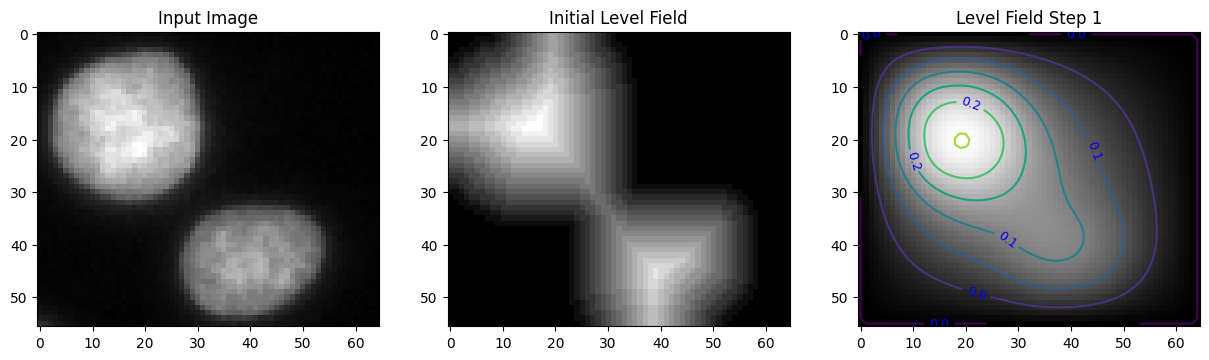

In [5]:
output_step_1 = first_approach.step_1(initial_level_set)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].set_title('Input Image')
ax[0].imshow(image, 'gray')
ax[1].set_title('Initial Level Field')
ax[1].imshow(initial_level_set, 'gray')
ax[2].set_title('Level Field Step 1')
ax[2].imshow(output_step_1, 'gray')
cs = ax[2].contour(output_step_1)
ax[2].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)


## Step 2: Using energy function 1

Question that aren't explained in paper:
- Which alpha should we make the threshold ?
- How we choose how many segmentation we have ?
- Do we have to apply distance function ?

---------- Iteration 0 with alpha=0.0 --------------------
---------- Iteration 1 with alpha=0.060460739602631514 --------------------
----------------- Iteration error 0.9202271189008441 ------------------------


Gauss Seidel Iteration:  13%|█▎        | 1251/10000 [00:04<00:32, 268.20it/s]


The solution converged after 1251 iterations
----------------- Iteration error 0.2536514265517519 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1417/10000 [00:04<00:29, 291.38it/s]


The solution converged after 1417 iterations
----------------- Iteration error 0.1319849337021129 ------------------------
Level set is all positive


Gauss Seidel Iteration:  15%|█▍        | 1470/10000 [00:05<00:29, 289.01it/s]


The solution converged after 1470 iterations
Converged with an error 0.04701012347425663
---------- Iteration 2 with alpha=0.12092147920526303 --------------------
----------------- Iteration error 1.0072287150791712 ------------------------


Gauss Seidel Iteration:  11%|█▏        | 1136/10000 [00:04<00:32, 269.20it/s]


The solution converged after 1136 iterations
----------------- Iteration error 0.4390306383728297 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1430/10000 [00:05<00:33, 254.26it/s]


The solution converged after 1430 iterations
----------------- Iteration error 0.34817780113547797 ------------------------
Level set is all positive


Gauss Seidel Iteration:  15%|█▍        | 1470/10000 [00:05<00:32, 265.26it/s]


The solution converged after 1470 iterations
Converged with an error 0.028060157903917166
---------- Iteration 3 with alpha=0.18138221880789454 --------------------
----------------- Iteration error 1.0545239448547363 ------------------------


Gauss Seidel Iteration:  19%|█▉        | 1880/10000 [00:07<00:30, 262.99it/s]


The solution converged after 1880 iterations
----------------- Iteration error 0.6982680620320089 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1428/10000 [00:05<00:32, 266.76it/s]


The solution converged after 1428 iterations
----------------- Iteration error 0.5179828769062483 ------------------------
Level set is all positive


Gauss Seidel Iteration:  15%|█▍        | 1471/10000 [00:05<00:32, 266.18it/s]


The solution converged after 1471 iterations
Converged with an error 0.001892464070346661
---------- Iteration 4 with alpha=0.24184295841052605 --------------------
----------------- Iteration error 1.077216488974435 ------------------------


Gauss Seidel Iteration:  21%|██        | 2102/10000 [00:08<00:30, 259.90it/s]


The solution converged after 2102 iterations
----------------- Iteration error 0.7047956603123835 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1420/10000 [00:05<00:33, 257.79it/s]


The solution converged after 1420 iterations
----------------- Iteration error 0.5415837810083116 ------------------------
Level set is all positive


Gauss Seidel Iteration:  15%|█▍        | 1471/10000 [00:05<00:31, 269.98it/s]


The solution converged after 1471 iterations
Converged with an error 0.0


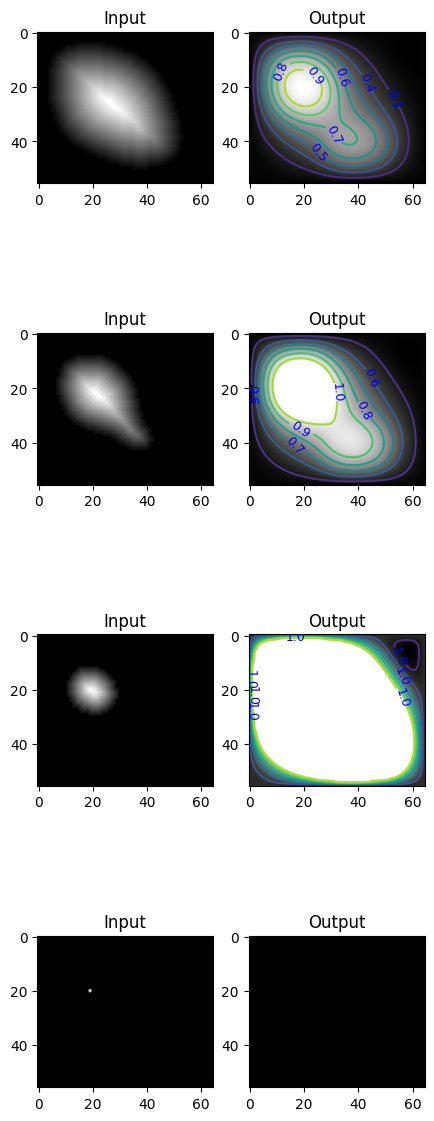

In [6]:
output_step_2 = first_approach.step_2(output_step_1)

N = len(output_step_2)
input_step_2 = first_approach.input_step_2.copy()
fig, ax = plt.subplots(N, 2, figsize=(5,15)) 
for i, level in enumerate(output_step_2):
    ax[i, 0].set_title('Input')
    ax[i,0].imshow(input_step_2[i], 'gray')
    
    ax[i,1].set_title('Output')
    ax[i,1].imshow(level, 'gray')
    cs = ax[i, 1].contour(level)
    ax[i, 1].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

## Step 3: Dilate and Energy Function 2

For dilatation I nead a binary mask, how do I choose it?

---------- Iteration 0 -----------------------------
----------------- Iteration error 0.8926548276628766 ------------------------


Gauss Seidel Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Gauss Seidel Iteration:  37%|███▋      | 3694/10000 [00:14<00:24, 256.94it/s]


The solution converged after 3694 iterations
----------------- Iteration error 0.14202224339476222 ------------------------


Gauss Seidel Iteration:  38%|███▊      | 3850/10000 [00:14<00:23, 258.52it/s]


The solution converged after 3850 iterations
----------------- Iteration error 0.18554035296551544 ------------------------


Gauss Seidel Iteration:  38%|███▊      | 3850/10000 [00:14<00:23, 258.49it/s]


The solution converged after 3850 iterations
Converged with an error 4.627349311135419e-06
---------- Iteration 1 -----------------------------
----------------- Iteration error 0.8927803039550781 ------------------------


Gauss Seidel Iteration:  37%|███▋      | 3694/10000 [00:14<00:24, 253.19it/s]


The solution converged after 3694 iterations
----------------- Iteration error 0.14216233073762793 ------------------------


Gauss Seidel Iteration:  38%|███▊      | 3850/10000 [00:16<00:26, 228.36it/s]


The solution converged after 3850 iterations
----------------- Iteration error 0.1859108840017972 ------------------------


Gauss Seidel Iteration:  38%|███▊      | 3850/10000 [00:14<00:23, 261.25it/s]


The solution converged after 3850 iterations
Converged with an error 4.640894065845219e-06
---------- Iteration 2 -----------------------------
---------- Iteration 3 -----------------------------


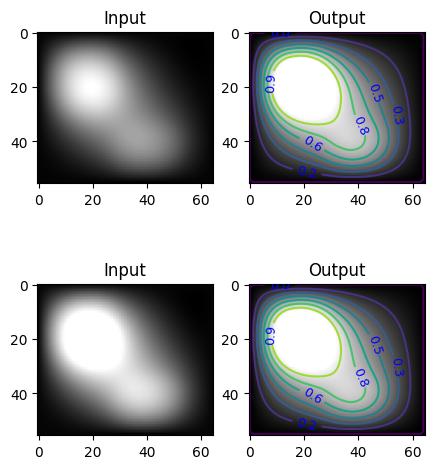

In [8]:
output_step_3 = first_approach.step_3(output_step_2)

N = len(output_step_3)
fig, ax = plt.subplots(N, 2, figsize=(5,N*3)) 
for i, level in enumerate(output_step_3):
    ax[i, 0].set_title('Input')
    ax[i,0].imshow(output_step_2[i], 'gray')
    
    ax[i,1].set_title('Output')
    ax[i,1].imshow(level, 'gray')
    cs = ax[i, 1].contour(level)
    ax[i, 1].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

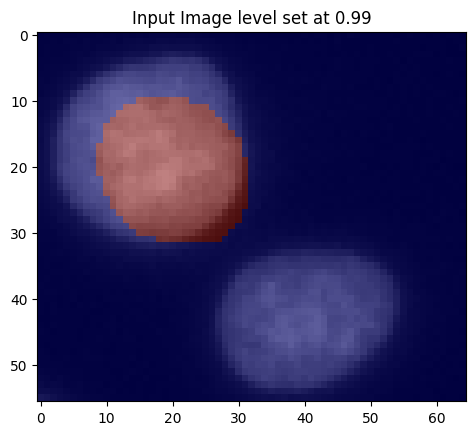

In [11]:
alpha = 0.99
last_level_set = output_step_3[0]
level_set_at_alpha = last_level_set > alpha
fig, ax = plt.subplots(1,1)
ax.set_title(f'Input Image level set at {alpha}')


ax.imshow(image, cmap='gray')
ax.imshow(level_set_at_alpha, 'jet', interpolation='none', alpha=0.5)